In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv('train.csv')

In [3]:
# **Loading the dataset**

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class', 'FamilySize'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000,11.000000


In [12]:
#**Data cleaning**

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
FamilySize       0
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [17]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df['Lifeboat'].fillna(df['Lifeboat'].mode()[0],inplace=True)

In [18]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [19]:
df['Class'].fillna(df['Class'].mean(),inplace=True)

In [20]:
df['Body'].fillna(df['Body'].mode()[0],inplace=True)

In [21]:
df['Destination'].fillna(df['Destination'].mode()[0],inplace=True)

In [22]:
df['Boarded'].fillna(df['Boarded'].mode()[0],inplace=True)

In [23]:
df['Hometown'].fillna(df['Hometown'].mode()[0],inplace=True)

In [24]:
df['Age_wiki'].fillna(df['Age_wiki'].mode()[0],inplace=True)

In [25]:
df['WikiId'].fillna(df['WikiId'].mode()[0],inplace=True)

In [26]:
df['Name_wiki'].fillna(df['Name_wiki'].mode()[0],inplace=True)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class', 'FamilySize'],
      dtype='object')

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
WikiId         0
Name_wiki      0
Age_wiki       0
Hometown       0
Boarded        0
Destination    0
Lifeboat       0
Body           0
Class          0
FamilySize     0
dtype: int64

<AxesSubplot:>

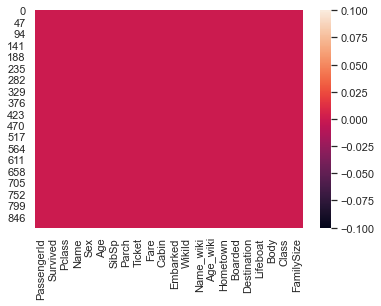

In [29]:
sns.heatmap(df.isna())

In [30]:
#Our dataset is readyfor visualisation 

In [31]:
#**Dtat Visualisation**

<AxesSubplot:title={'center':'Histogran of the Various Ages'}, xlabel='Age', ylabel='Frequency'>

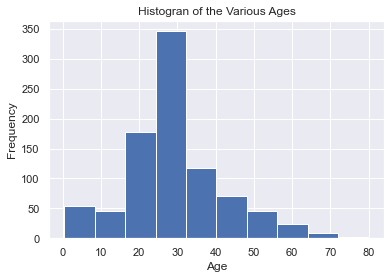

In [32]:
#Age distribution
plt.title('Histogran of the Various Ages')
plt.xlabel('Age')
df['Age'].plot.hist()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

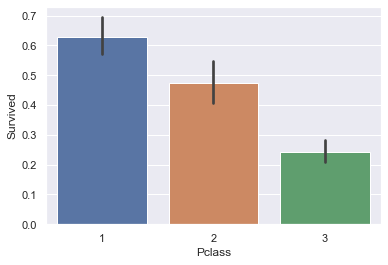

In [33]:
sns.barplot(x='Pclass', y='Survived', data=df)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

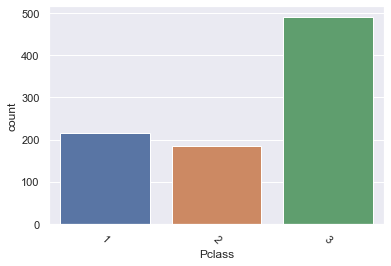

In [34]:
#pclass distribution
sns.countplot(x= "Pclass", data= df)
plt.xticks(rotation=-45)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

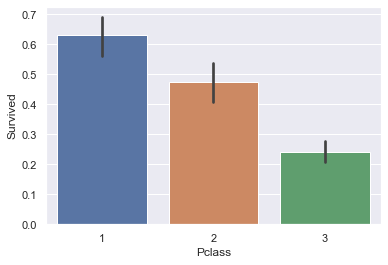

In [35]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [36]:
#Passengers in pclass 1 survived compared to those in 2 and 3

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


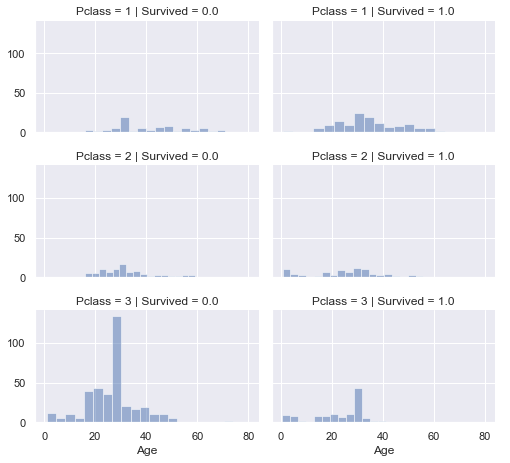

In [37]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

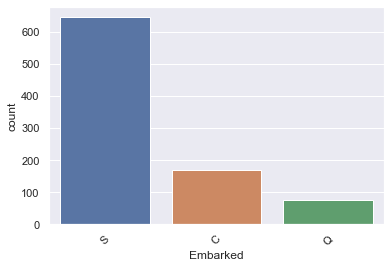

In [38]:
sns.countplot(x= "Embarked",data= df)
plt.xticks(rotation= 45)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

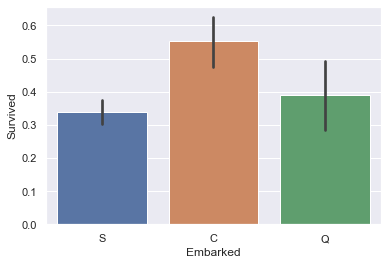

In [39]:
sns.barplot(x='Embarked', y='Survived', data=df)

In [40]:
#People who embarked on the journey in port C survived more 

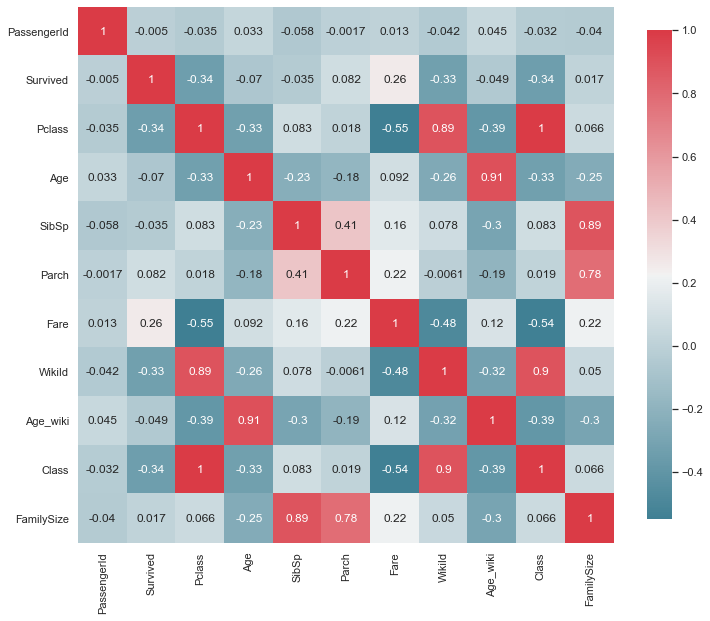

In [41]:
def plot_correlation_map( titanic ):

    corr = df.corr()

    s, ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(df)

In [42]:
#**Explaining Dataset**
#survival : Survival 0 = No, 1 = Yes
#pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
#sex : Sex Age 
#Age in years sibsp : Number of siblings / spouses abroad the Titanic parch  of parents / children abroad the Titanic ticket 
#Ticket number fare Passenger fare cabin Cabin number embarked 
#Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton



(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

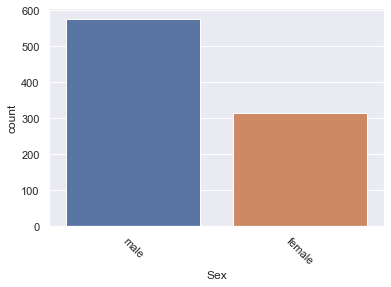

In [43]:
sns.countplot(x= "Sex", data= df)
plt.xticks(rotation=-45)

In [44]:
#The number of male passeengerrs on the ship superceeeds that of femmale

<AxesSubplot:xlabel='Survived', ylabel='count'>

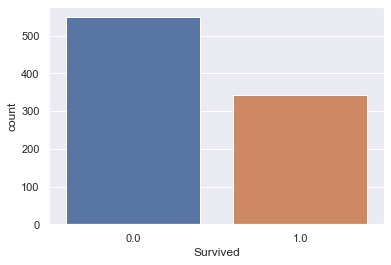

In [45]:
#**Analysing Dataset**
#Visualising survived(1) vs not survived (0) 
#countplot of survived vs not survived
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

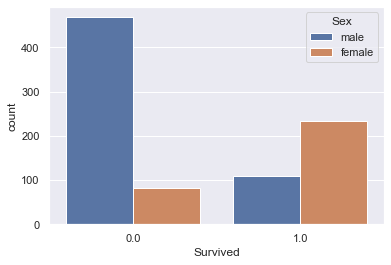

In [46]:
#** Male vs Female Survival chances **
sns.countplot(x='Survived',data=df,hue='Sex')

In [47]:
#**Applying Logistic regression **

In [48]:
#Fisrt , we turn all non numerical columns to numerical 

In [54]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
FamilySize       int64
dtype: object

In [55]:
#We will be changing the columns with "object" to integers and also be dropping some colummns that will not be of use to us 

In [10]:
#Convert sex column to numerical values
gender=pd.get_dummies(df['Sex'],drop_first=True)
df['Gender']=gender
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1


In [ ]:
#drop the columns not required 
df.drop(['Name','Sex','Ticket','Embarked',"Name_wiki","Age_wiki","WikiId",'Lifeboat','Hometown','Boarded',"Body","Destination"],axis=1,inplace=True)


In [20]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Class,Gender
0,1,0.0,3,22.0,1,0,7.2500,B96 B98,3.0,1
1,2,1.0,1,38.0,1,0,71.2833,C85,1.0,0
2,3,1.0,3,26.0,0,0,7.9250,B96 B98,3.0,0
3,4,1.0,1,35.0,1,0,53.1000,C123,1.0,0
4,5,0.0,3,35.0,0,0,8.0500,B96 B98,3.0,1


In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Class,Gender,FamilySize
0,1,0.0,3,22.0,1,0,7.2500,B96 B98,3.0,1,2
1,2,1.0,1,38.0,1,0,71.2833,C85,1.0,0,2
2,3,1.0,3,26.0,0,0,7.9250,B96 B98,3.0,0,1
3,4,1.0,1,35.0,1,0,53.1000,C123,1.0,0,2
4,5,0.0,3,35.0,0,0,8.0500,B96 B98,3.0,1,1


In [25]:
df[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


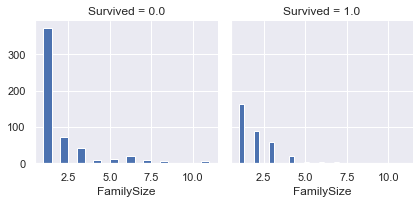

In [52]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'FamilySize', bins = 20)

In [ ]:
#**Apllying Logistic Regression

In [29]:
X = df[["Pclass", "Age", "Gender", "FamilySize", ]]
y = df["Survived"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred  = logreg.predict(X_test)

In [35]:
from sklearn import metrics
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.80


In [36]:
#The model has a 80% accuracy

In [37]:
from sklearn.metrics import balanced_accuracy_score

In [38]:
threshold = []
accuracy = []

for p in np.unique(logreg.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (logreg.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

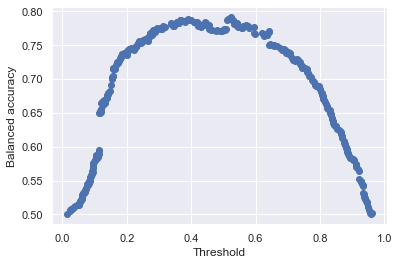

In [39]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [40]:
print("Threshold that maximizes accuracy: ", threshold[np.argmax(accuracy)])

Threshold that maximizes accuracy:  0.5235420200731801


In [41]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [42]:
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)
THRESHOLD =   0.5235420200731801
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds)], index=["Accuracy"])

,0
Accuracy,0.928


In [43]:
#Changing the default threshold by a threshold that maximizes accuracy has indeed maximized accuracy metric. In fact, the model does a very good job predicting whether passengers have survived or not, with 92.8% accuracy.

In [44]:
#**Confusion Matrix**
#Just like accuracy, a confusion matrix is another way to evaluate Logistic Regression performance with more precision

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

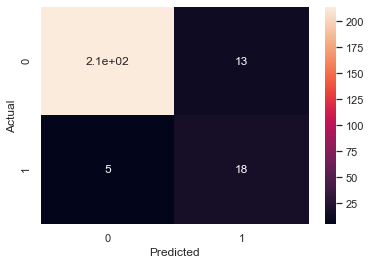

In [45]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [47]:
#Here, confusion matrix tells us that:

#13 passengers who did not survive are wrongly predicted as survivors (False Positives)

#5 passengers who survived are wrongly predicted as dead (False Negatives)

#2100 passengers who died also predicted as dead (True Positives)

#18 passengers who survived are also predicted as survivors (True Negatives)

#Accuracy: How many correct predictions have we made from all the observations? Accuracy = (TP+TN)/(TP+FP+FN+TN)= 98.55%

#Recall: Out of all the passengers that died, how many did we get correct? Recall = TP/(TP+FN)= 99.76%

#Precision: Out of all the passengers that we predicted to be dead, how many did we actually get right? Precision= TP/(TP+FP)= 99.39%

In [48]:
#Another Validation Matrix: ROC/AUC AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC (Receiver Operating Characteristic) is a probability curve and AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between passengers who survived and those who did not.

#The ROC curve summarizes all of the confusion matrices that each threshold produced and is plotted with True Positive Rate (TPR) which is the same thing as recall metric (or sensitivity) against the False Positive Rate (FPR) where TPR is on the y-axis and FPR is on the x-axis.

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

ROC_AUC_score for Logistic Regression:  0.8626699865926067


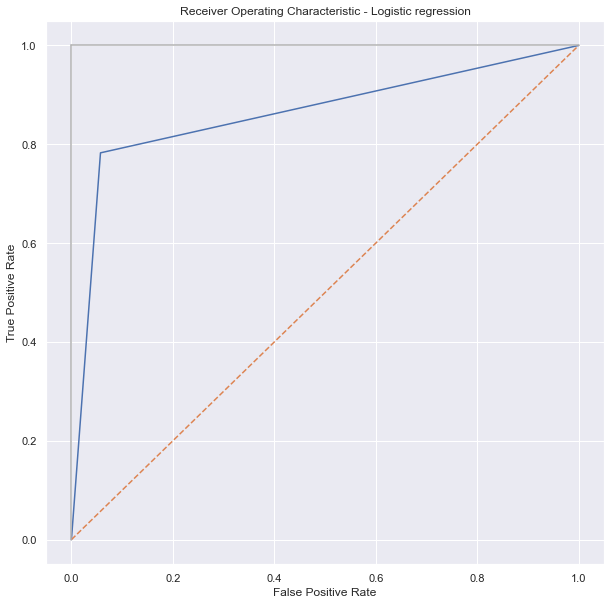

In [50]:
# Creating False and True Positive Rates and printing Score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, preds)
print('ROC_AUC_score for Logistic Regression: ', roc_auc_score(y_test, preds))
# Plot's size
plt.subplots(1, figsize=(10,10))
# Plot's title 
plt.title('Receiver Operating Characteristic - Logistic regression')
# Plot ROC Curve 
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

In [51]:
#Our ROC-AUC_Score is equal to 0.9 which denotes a very good classifier able to predict passengers that are actually dead as dead and passengers that are actually alive as survivors.